# Prosper Loan Data Exploration

Prosper Marketplace, Inc. is a San Francisco, California-based company in the peer-to-peer lending industry. This dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.


## Preliminary Wrangling

In [1]:
### Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


## Load in the dataset and explore its properties


In [2]:
# Load the dataset into a pandas dataframe and print statistics
loans = pd.read_csv('prosperLoanData.csv')

# Print information about the DataFrame
loans.info()

# Access the first 5 rows of the dataframe
loans.head()

# Generate descriptive statistics for the dataset
loans.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### What is the structure of your dataset?

>This dataset comprises 113,937 records, each containing 81 attributes related to individual loans. These attributes encompass details such as loan amount, borrower rate (interest rate), current loan status, borrower income, and numerous others. It's worth noting that the majority of these attributes are numeric in nature.

### What is/are the main feature(s) of interest in your dataset?

>While the dataset offers an array of features for exploration, this analysis focuses primarily on investigating the BorrowerAPR and BorrowerRate variables, in addition to other relevant attributes.
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The key attributes that will play a pivotal role in supporting the analysis of BorrowerAPR and BorrowerRate include: 

|Column      | Description |
| :---       | :---: |
|**Term**       | The length of the loan expressed in months.
| **LoanStatus** | The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
|**BorrowerAPR**            | The Borrower's Annual Percentage Rate (APR) for the loan.
|**BorrowerRate**       | The Borrower's interest rate for this loan. 
|**ProsperRating (Alpha)**| The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.
|**ListingCategory** | The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
|**EmploymentStatus** 	  | The employment status of the borrower at the time they posted the listing.
|**IsBorrowerHomeowner**  | A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner. TRUE or FALSE
|**IncomeRange** | The income range of the borrower at the time the listing was created.
|**DebtToIncomeRatio** | The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).
|**StatedMonthlyIncome** | The monthly income the borrower stated at the time the listing was created.
|**LoanOriginalAmount** | The original amount of the loan.
| **MonthlyLoanPayment** | The scheduled monthly loan payment.

## Univariate Exploration

**Term**

In [3]:
loans.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

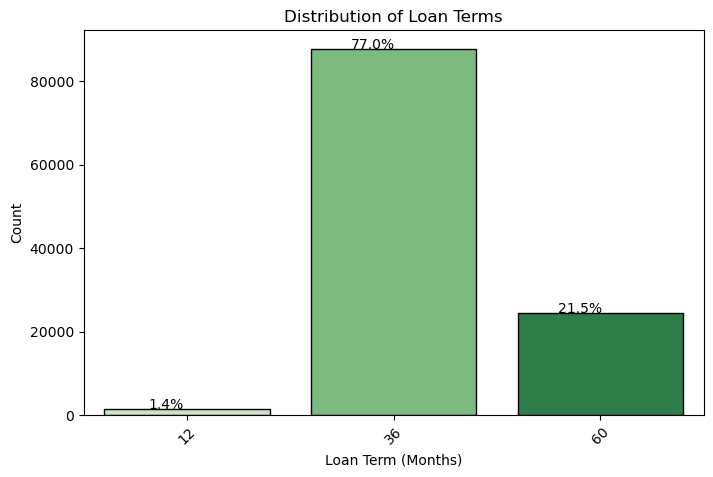

In [4]:
# Plot a histogram for the distribution of loan terms
plt.figure(figsize=[8, 5])  # Set the figure size for better visibility

# Create a countplot using Seaborn
ax = sns.countplot(data=loans, x='Term', palette='Greens', edgecolor='black')

plt.xlabel('Loan Term (Months)')  # Label for the x-axis
plt.ylabel('Count')  # Label for the y-axis
plt.title('Distribution of Loan Terms')  # Title for the plot

# Add percentage labels above each bar
total_count = len(loans)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height() + 20
    ax.annotate(percentage, (x, y), fontsize=10, ha='center')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()  # Display the plot


> Based on the visualization provided, it's evident that there are three available loan terms. The most frequently selected term is 36 months, although there is also a notable preference for the 60-month (5-year) term among some borrowers.

**LoanStatus**

- Which categories do majority of loans fall in ?

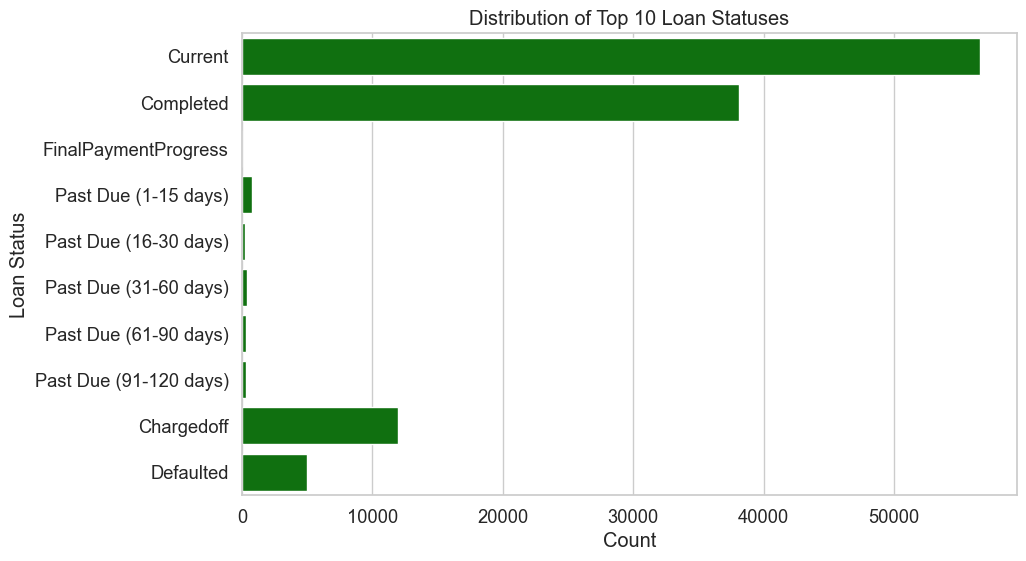

In [54]:
# Define the desired order of loan statuses
custom_order = [
    'Current', 'Completed', 'FinalPaymentProgress',
    'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)',
    'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Chargedoff', 'Defaulted'
]

# Create a categorical data type with the custom order
loan_status_order = pd.CategoricalDtype(categories=custom_order, ordered=True)

# Apply the categorical data type to the 'LoanStatus' column
loans['LoanStatus'] = loans['LoanStatus'].astype(loan_status_order)

# Filter the data to include only the loan statuses in the custom order
loans_filtered = loans[loans['LoanStatus'].isin(custom_order)]

# Plot a bar chart for the top 10 loan statuses
plt.figure(figsize=[10, 6])  # Reduced figure size for better rendering

# Create a horizontal bar chart using Seaborn with solid green bars
top_statuses = loans_filtered['LoanStatus'].value_counts().nlargest(10)  # Select the top 10 statuses
sns.barplot(x=top_statuses, y=top_statuses.index, color='green')  # Use 'green' color

plt.xlabel('Count')  # Label for the x-axis
plt.ylabel('Loan Status')  # Label for the y-axis
plt.title('Distribution of Top 10 Loan Statuses')  # Title for the plot

plt.show()  # Display the plot

> The plot above illustrates that the majority of loans within the dataset belong to the categories of "Current," followed by "Completed," "Charged-off," and "Defaulted & Past Due (1-15 days)."

**BorrowerAPR**

- What is the distribution of the Borrower APR ?

In [55]:
# statistical properties of the variable 
loans.BorrowerAPR.describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

>Descriptive statistics can guide us in determining suitable minimum and maximum bin boundaries for the plot. We can establish these bin edges by utilizing NumPy's arange function.

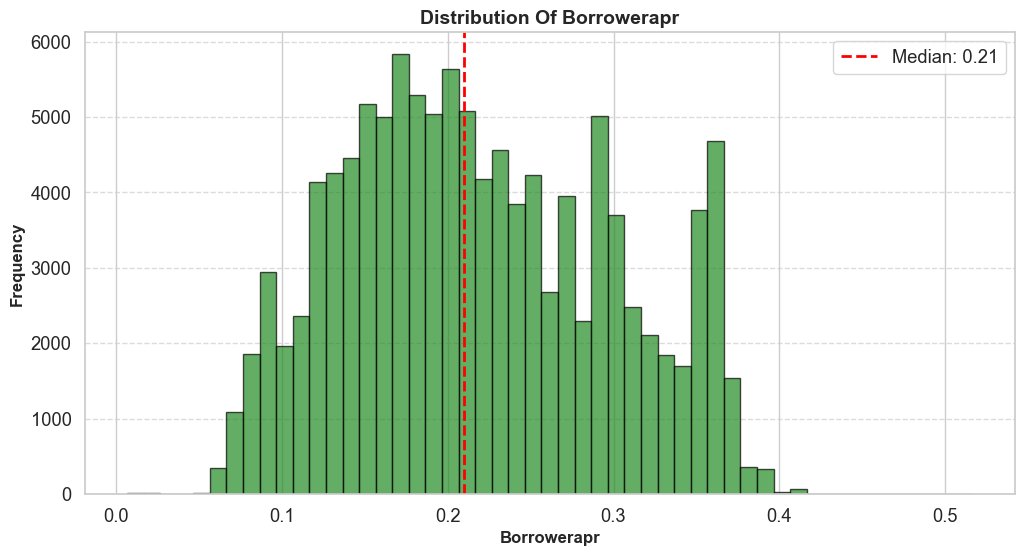

In [56]:
def myHistPlot(df, xVar, interval, figsize=[12,6], title=''):
    '''
    input: takes a dataframe, a variable, and interval 
    output: returns a histogram distribution of the variable 
    '''
    # Set intervals for bins
    bins = np.arange(df[xVar].min(), df[xVar].max() + interval, interval)
    
    # Create the figure and axes
    fig, ax = plt.subplots(figsize=figsize)
    
    # Plot the histogram
    ax.hist(df[xVar], bins=bins, edgecolor='black', color='#228B22', alpha=0.7)
    
    # Add a vertical line for the median
    median = df[xVar].median()
    ax.axvline(median, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
    
    # Add title and format it 
    ax.set_title(f'Distribution of {xVar.replace("_"," ").title()}{title}'.title(), fontsize=14, weight="bold")
    
    # Add X and Y labels and format them 
    ax.set_xlabel(xVar.replace("_"," ").title(), fontsize=12, weight="bold")
    ax.set_ylabel('Frequency'.title(), fontsize=12, weight="bold")
    
    # Add grid lines for better readability
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add a legend for the median line
    ax.legend(loc='upper right')
    
    plt.show()

# Call plot function (using all data)
myHistPlot(loans, 'BorrowerAPR', 0.01)


>The APR distribution exhibits multiple modes. It shows a minor peak around 0.09, a prominent peak at approximately 0.18, another minor peak near 0.29, and a significant peak between 0.35 and 0.36. Very few individuals have an APR exceeding 0.4. A higher APR indicates a greater interest rate on borrowed funds, resulting in increased interest payments.

**BorrowerRate**

In [57]:
# statistical properties of the variable 

loans.BorrowerRate.describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

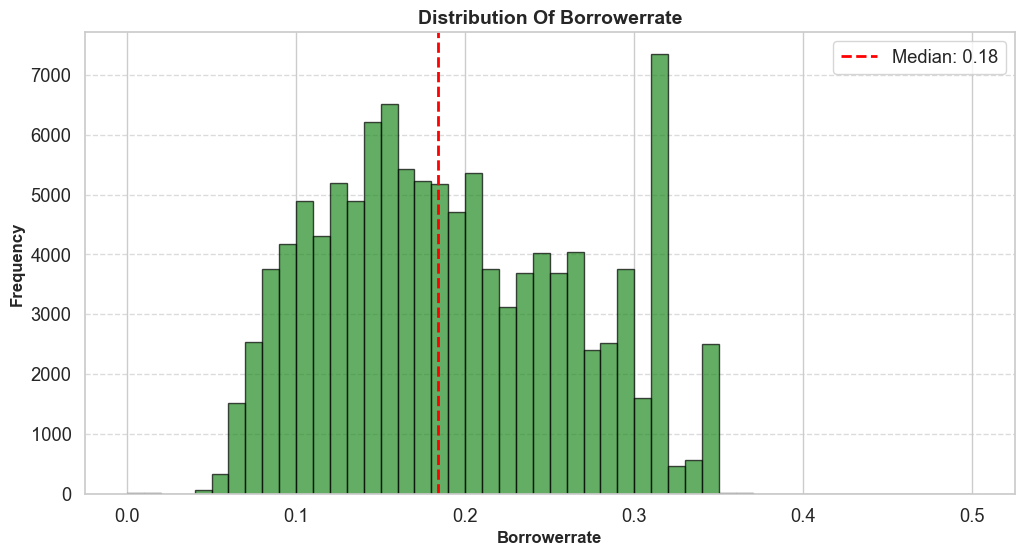

In [58]:
# call plot function (using all data)

myHistPlot(loans,'BorrowerRate', 0.01)

> The distribution is multimodal, with a prominent peak at approximately 0.31 to 0.32. Rates exceeding 0.35 are rare, with a median rate of 0.18.

**ProsperRating (Alpha)** 

In [59]:
loans['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

In [60]:
# Convert the 'ProsperRating (Alpha)' column to an ordered categorical data type
# Define the desired order for the categories
rating_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']

# Create an ordered categorical data type with the specified order
ordered_rating = pd.api.types.CategoricalDtype(ordered=True, categories=rating_order)

# Apply the ordered categorical data type to the 'ProsperRating (Alpha)' column in the DataFrame
loans['ProsperRating (Alpha)'] = loans['ProsperRating (Alpha)'].astype(ordered_rating)


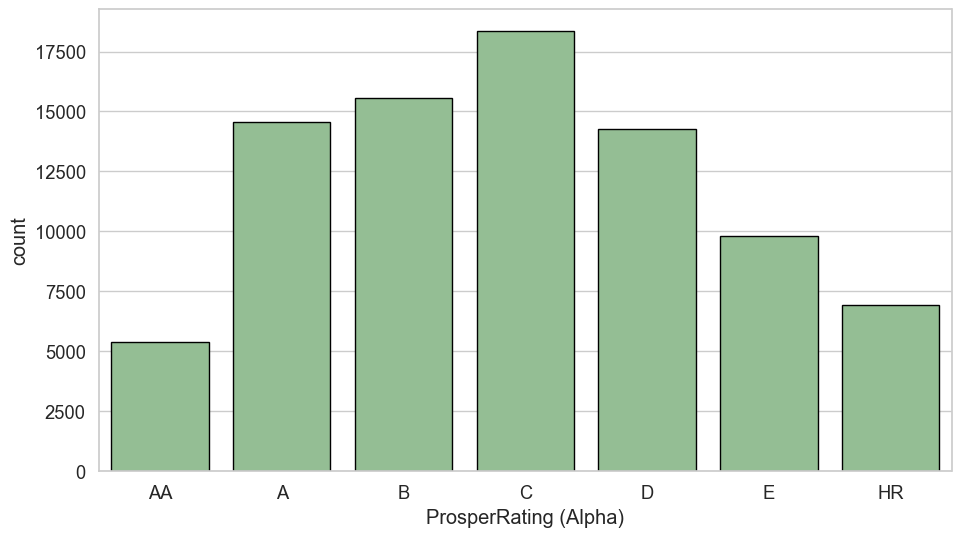

In [61]:
# Define a lighter green color
green_color = sns.color_palette("light:green")[2]  # Adjust the index for the desired lighter green shade

# Create a figure and set the figure size
plt.figure(figsize=(11, 6))

# Plot a countplot of 'ProsperRating (Alpha)' with the specified color and edge color
sns.countplot(data=loans, x='ProsperRating (Alpha)', color=green_color, edgecolor='black')

# Display the plot
plt.show()


> From the plot above, it's evident that the most common ratings are C, B, and D

**ListingCategory** 

In [62]:
loans['ListingCategory (numeric)'].value_counts()

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory (numeric), dtype: int64

- I will substitute the numeric codes with their respective descriptions to provide a more comprehensive understanding of the variable.

In [63]:
# Define a dictionary to map numeric listing categories to their corresponding descriptions.
listing_categories = {0 : 'Not Available', 
                1 : 'Debt Consolidation', 
                2 : 'Home Improvement', 
                3 : 'Business', 
                4 : 'Personal Loan', 
                5 : 'Student Use', 
                6 : 'Auto', 
                7 : 'Other', 
                8 : 'Baby&Adoption', 
                9 : 'Boat', 
                10 : 'Cosmetic Procedure', 
                11 : 'Engagement Ring', 
                12 : 'Green Loans', 
                13 : 'Household Expenses', 
                14 : 'Large Purchases', 
                15 : 'Medical/Dental', 
                16 : 'Motorcycle', 
                17 : 'RV', 
                18 : 'Taxes', 
                19 : 'Vacation', 
                20 : 'Wedding Loans'}

In [64]:
# Replace the numeric listing categories with their corresponding descriptions in the 'ListingCategory' column
loans['ListingCategory'] = loans['ListingCategory (numeric)'].replace(to_replace=listing_categories)


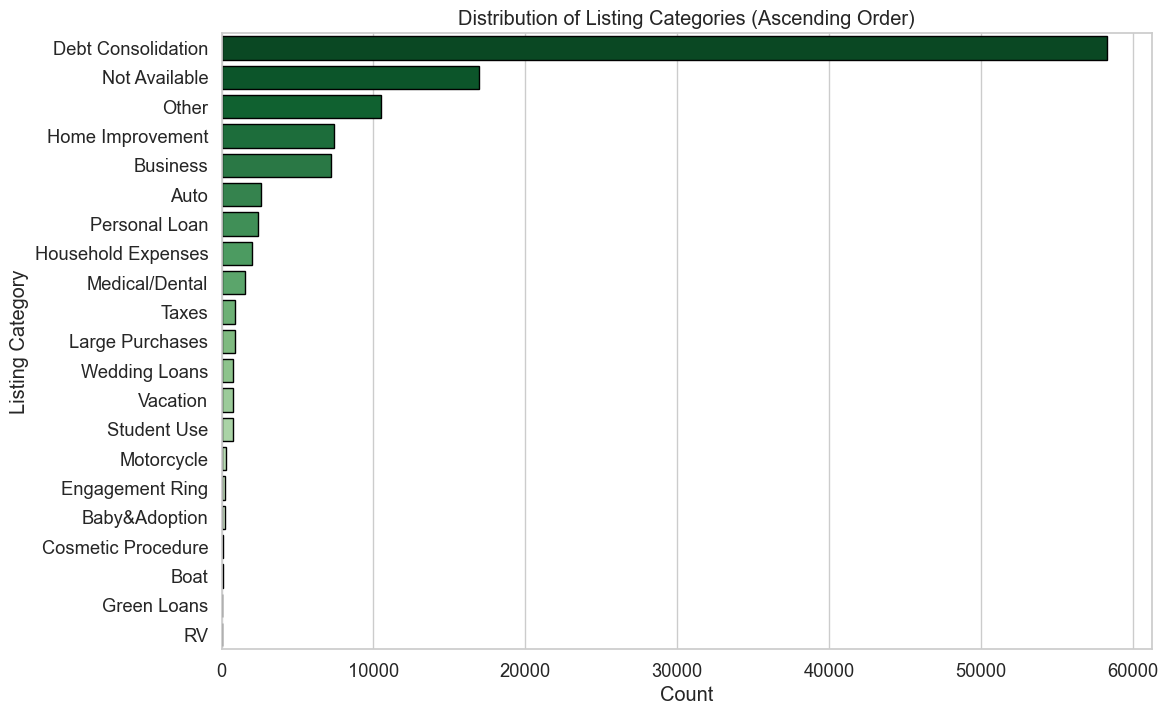

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar chart of the listing categories in ascending order of counts
plt.figure(figsize=(12, 8))
sns.countplot(data=loans, y='ListingCategory', palette="Greens_r", edgecolor='black', order=loans['ListingCategory'].value_counts().index)

plt.xlabel('Count')  # Label for the x-axis
plt.ylabel('Listing Category')  # Label for the y-axis
plt.title('Distribution of Listing Categories (Ascending Order)')  # Title for the plot

plt.show()  # Display the plot


> From the chart above, it's evident that a significant number of individuals acquire loans for the purpose of "Debt Consolidation," primarily to manage and consolidate their existing debt obligations.

**EmploymentStatus**

In [66]:
loans.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

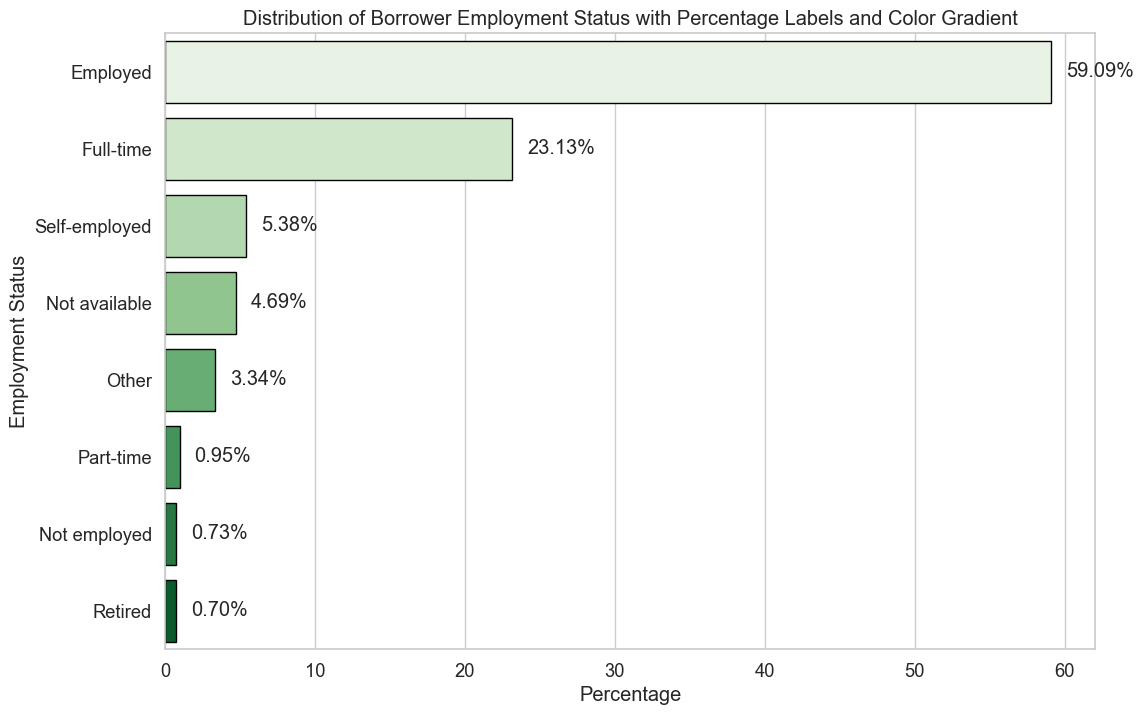

In [67]:
# Calculate the percentage of borrowers in each employment status category
percentage_data = (loans['EmploymentStatus'].value_counts() / len(loans)) * 100

# Create a color palette with a gradient
color_palette = sns.color_palette("Greens", len(percentage_data))

# Sort the data by count to maintain color consistency
percentage_data = percentage_data.sort_values(ascending=False)

# Create the bar chart with color gradient
plt.figure(figsize=(12, 8))
bars = sns.barplot(y=percentage_data.index, x=percentage_data.values, palette=color_palette, edgecolor='black')

# Add percentage labels on the bars
for bar, percentage in zip(bars.patches, percentage_data):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height() / 2, f'{percentage:.2f}%', ha='left', va='center')

plt.xlabel('Percentage')
plt.ylabel('Employment Status')
plt.title('Distribution of Borrower Employment Status with Percentage Labels and Color Gradient')
plt.show()


> The majority of loan borrowers are employed, which is a logical trend as a source of income is necessary to repay the loans. 

**IsBorrowerHomeowner**

In [68]:
loans['IsBorrowerHomeowner'].value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

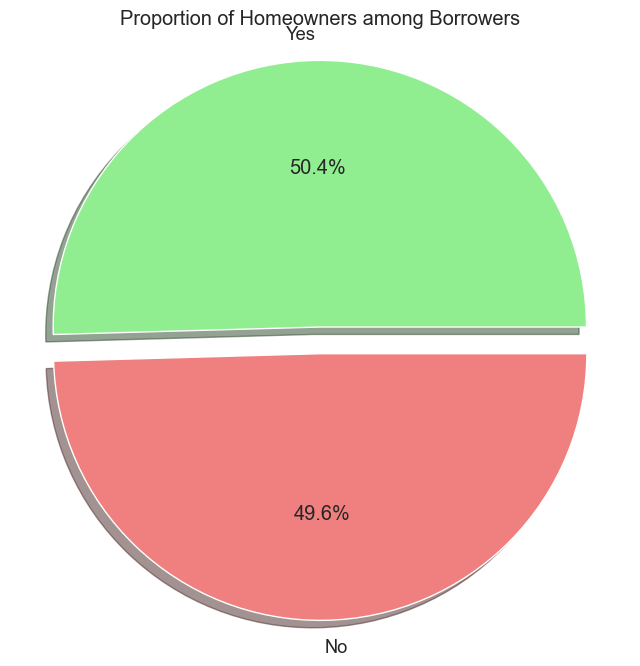

In [69]:
# Pie chart to show the proportion of people who are homeowners
labels = ['Yes', 'No']  # Define the labels
plt.figure(figsize=(8, 8))
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # Explode the 'Yes' slice for emphasis

plt.pie(loans['IsBorrowerHomeowner'].value_counts(), labels=labels, autopct='%0.1f%%', colors=colors, explode=explode, shadow=True)
plt.title('Proportion of Homeowners among Borrowers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


> A **slight** majority of borrowers are homeowners.

**IncomeRange**

In [70]:
loans.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
$0                 9168
$1-24,999          7274
Name: IncomeRange, dtype: int64

- To streamline the visualization, I will group together the categories "Not employed," "Not displayed," and "0."

In [71]:
loans['IncomeRange'].replace(['Not employed', 'Not displayed'], '$0', inplace = True)

In [72]:
# Create ordinal categories for income ranges
ordinal_income_ranges = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0']
income_order = pd.api.types.CategoricalDtype(ordered=True, categories=ordinal_income_ranges)
loans['IncomeRange'] = loans['IncomeRange'].astype(income_order)


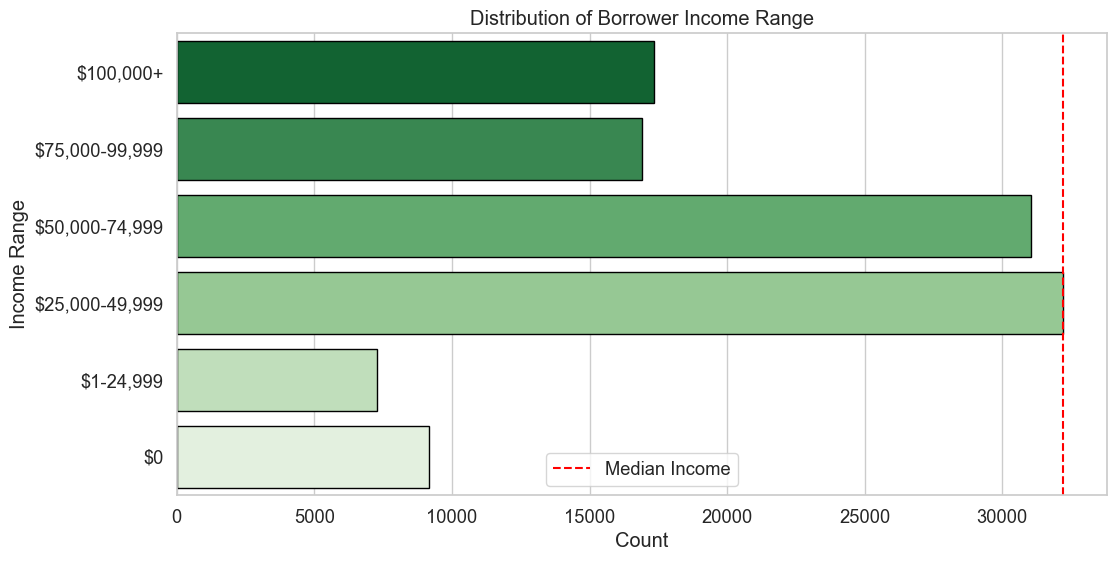

In [74]:
# Bar chart showing income range distribution with percentage labels on the right axis
plt.figure(figsize=[12, 6])
sns.countplot(data=loans, y='IncomeRange', palette='Greens_r', edgecolor='black')
plt.xlabel('Count')
plt.ylabel('Income Range')
plt.title('Distribution of Borrower Income Range')

# Add median income line
median_income = loans['IncomeRange'].mode()[0]
income_counts = loans['IncomeRange'].value_counts()
plt.axvline(x=income_counts[median_income], color='red', linestyle='--', label='Median Income')


# Add legend
plt.legend(['Median Income'])


> The income category of `$25,000` - `$49,999` has the highest number of borrowers

**Debt to Income Ratio**

In [75]:
loans.DebtToIncomeRatio.value_counts()

0.18000    4132
0.22000    3687
0.17000    3616
0.14000    3553
0.20000    3481
           ... 
0.06375       1
0.06281       1
0.19960       1
0.17775       1
0.23284       1
Name: DebtToIncomeRatio, Length: 1207, dtype: int64

In [76]:
loans.DebtToIncomeRatio.describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

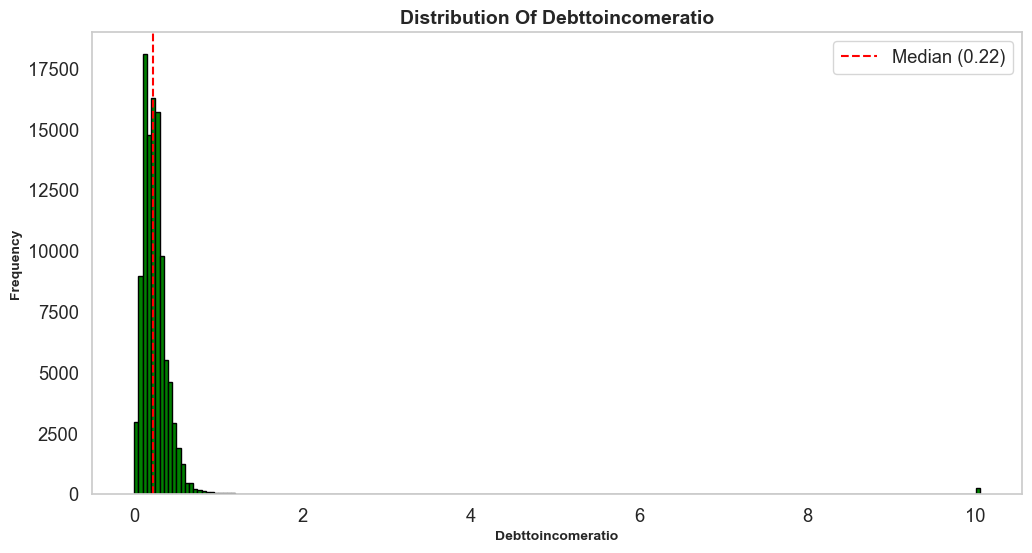

In [77]:
def myHistPlot(df, xVar, interval, figsize=[12, 6], title='', bar_color='green', median_color='grey'):
    '''
    input: takes a dataframe, a variable and interval 
    output: returns a histogram distribution of the variable 
    '''
    # set intervals for bins
    bins = np.arange(df[xVar].min(), df[xVar].max() + interval, interval)

    # plot
    df[xVar].hist(bins=bins, grid=False, edgecolor='black', figsize=figsize, color=bar_color)

    # calculate median
    median = df[xVar].median()

    # for labels, add a space instead of underscore
    xVar = xVar.replace("_", " ")

    # add title and format it
    plt.title(f'Distribution of {xVar}{title}'.title(), fontsize=14, weight="bold")

    # add X label and format it
    plt.xlabel(xVar.title(), fontsize=10, weight="bold")

    # add y label and format it
    plt.ylabel('Frequency'.title(), fontsize=10, weight="bold")

   # add a red median line with the specified color
    plt.axvline(median, linestyle='dashed', linewidth=1.5, label=f'Median ({median:.2f})', color=median_color)


    # show legend
    plt.legend()

# call plot function with green bars and grey median line
myHistPlot(loans, 'DebtToIncomeRatio', 0.05, bar_color='green', median_color='red')


- From the plot above, it's evident that the distribution exhibits multiple peaks. To get a closer look at the distribution, I'll zoom in for a better view.

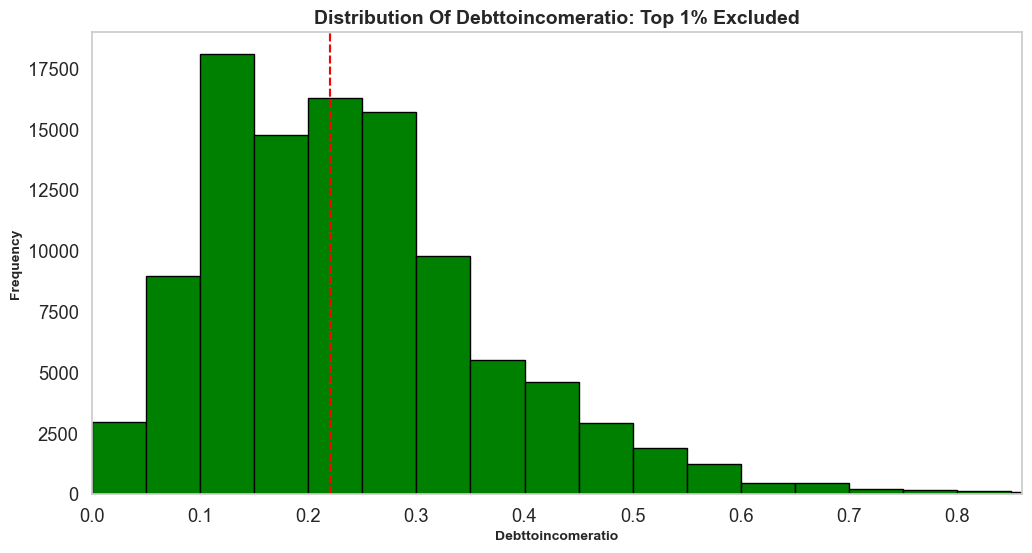

In [78]:
# Call the plot function
myHistPlot(loans, 'DebtToIncomeRatio', 0.05, title=": Top 1% Excluded")

# Set the upper bound of the x-axis to the 99th percentile
plt.axis([0, loans['DebtToIncomeRatio'].quantile(0.99), None, None])

# Add a vertical line at the median (50th percentile) in red
plt.axvline(loans['DebtToIncomeRatio'].median(), color='red', linestyle='--', label='Median')

# Remove the legend
plt.legend().set_visible(False)

# Show the plot
plt.show()


> The majority of DebtToIncomeRatios fall below 50%, indicating that most borrowers have a relatively low debt-to-income ratio. However, there is a notable minority with higher debt-to-income ratios. A lower ratio is generally favorable for borrowers as it signifies their ability to manage and repay their loans effectively.

**OriginalLoanAmount**

In [79]:
loans.LoanOriginalAmount.describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

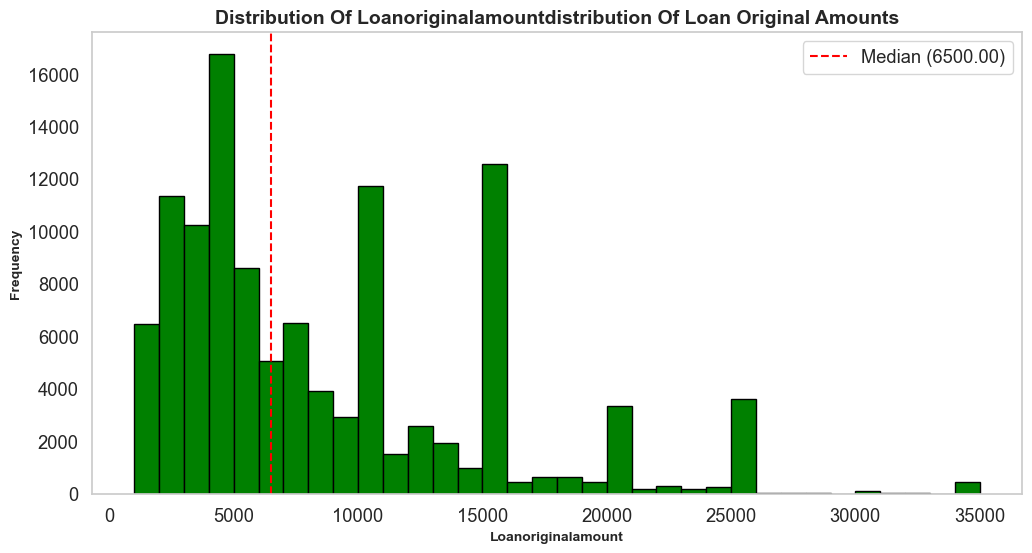

In [80]:
# Call plot function for LoanOriginalAmount Distribution with red median line
myHistPlot(loans, 'LoanOriginalAmount', 1000, title="Distribution of Loan Original Amounts", median_color='red')


>The most common values occur at 4k, followed by 15k and 10k. There are also notable peaks at 2k and 5k.

**StatedMonthlyIncome** 

In [81]:
loans.StatedMonthlyIncome.describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

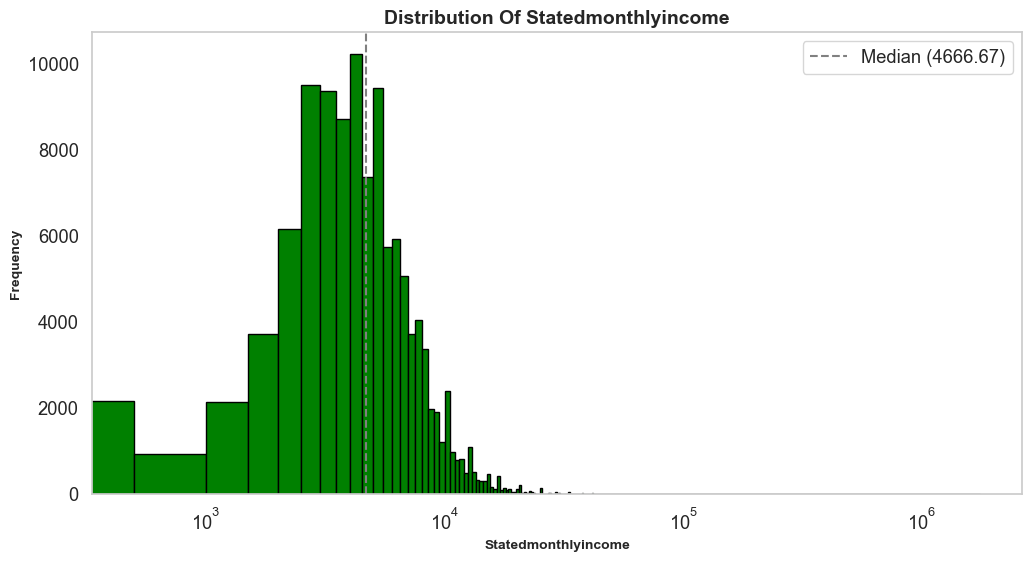

In [82]:
myHistPlot(loans,'StatedMonthlyIncome', 500)
plt.xscale('log')

-  The plot is higly skewed to the right
- I will zoom in to view the distribution better.

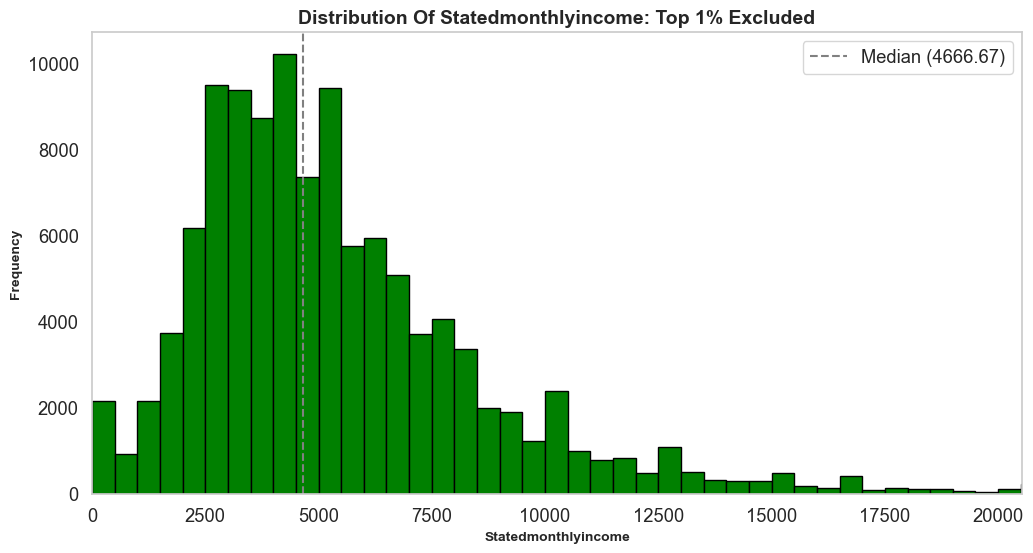

In [83]:
# call plot function 
myHistPlot(loans,'StatedMonthlyIncome', 500, title=": Top 1% Excluded")

# set upper bound x axis (99th percentile)
plt.axis([0, loans['StatedMonthlyIncome'].quantile(0.99), None, None]);

- Most borrowers have a monthly income that is less than 10k
- There are peaks a little below and above 5k

> Let's explore the MonthlyLoanPayment

Text(0.5, 0, 'Stated Monthly Income (Log Scale)')

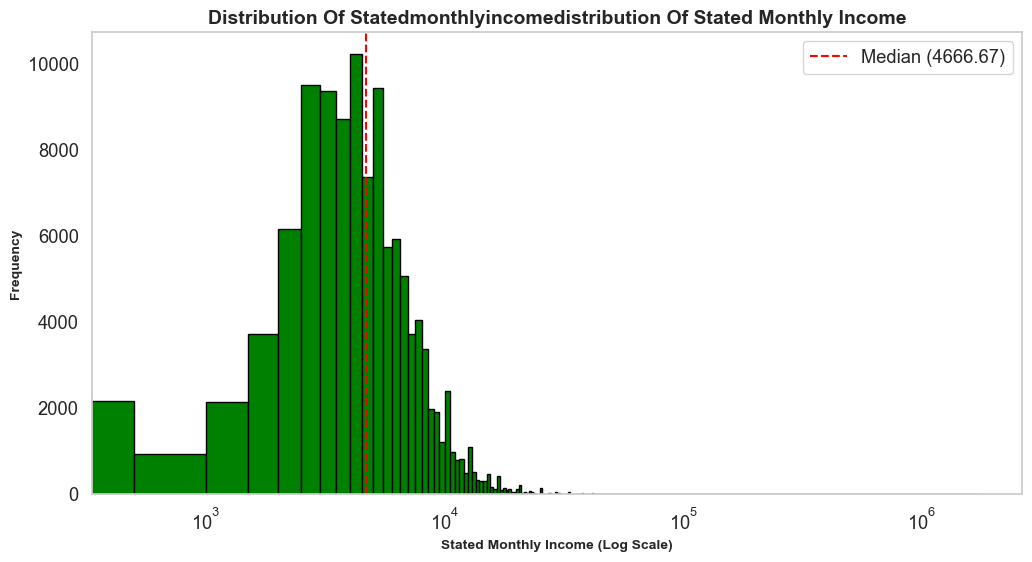

In [84]:
# Call the plot function for StatedMonthlyIncome Distribution
myHistPlot(loans, 'StatedMonthlyIncome', 500, title="Distribution of Stated Monthly Income", median_color='red')

# Set x-axis to a logarithmic scale
plt.xscale('log')

# Label the x-axis
plt.xlabel('Stated Monthly Income (Log Scale)'.title(), fontsize=10, weight="bold")


> Majority of monthly payments are below 500 USD

### Describe the Distribution of the Variables of Interest. Were There Any Noteworthy Observations? Were Any Data Transformations Applied?
- Regarding the income range, I consolidated the categories "Not employed," "Not displayed," and "0" to simplify the visualization.
- Concerning ListingCategories, I mapped the numeric values to their corresponding descriptions to provide a more comprehensive understanding of the variable.

## Bivariate Exploration

- Exploring the Correlation Among Key Features. To facilitate visualization, I'll categorize the variables of interest into Numeric and Categorical groups.

In [85]:
# Separate the dataset into numeric and categorical features

numeric_features = ['BorrowerAPR', 'BorrowerRate', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'MonthlyLoanPayment', 'LoanOriginalAmount']

categorical_features = ['Term', 'LoanStatus', 'EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeRange', 'ProsperRating (Alpha)', 'ListingCategory']


### 1. Quantitative Vs. Quantitave

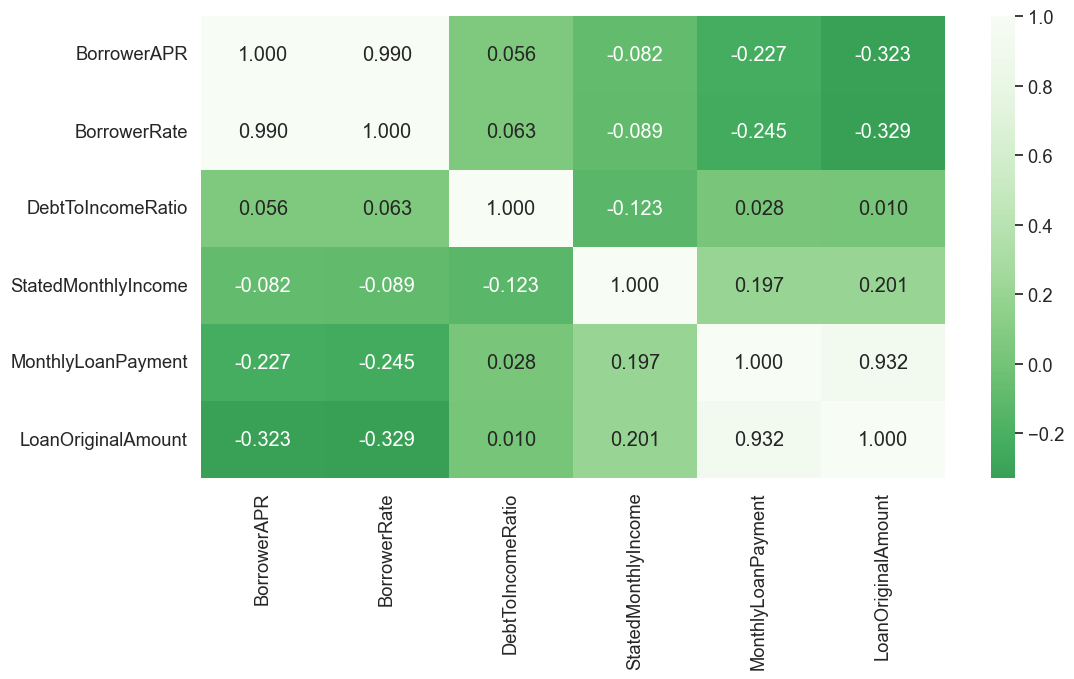

In [86]:
# Pairwise correlation plot for numeric features
plt.figure(figsize=[12, 6])  # Set the figure size for better visibility

# Create a heatmap of the correlation matrix, annotating values, and using a green color palette
sns.heatmap(loans[numeric_features].corr(), annot=True, fmt='.3f', center=0, cmap='Greens_r')

plt.show()  # Display the plot


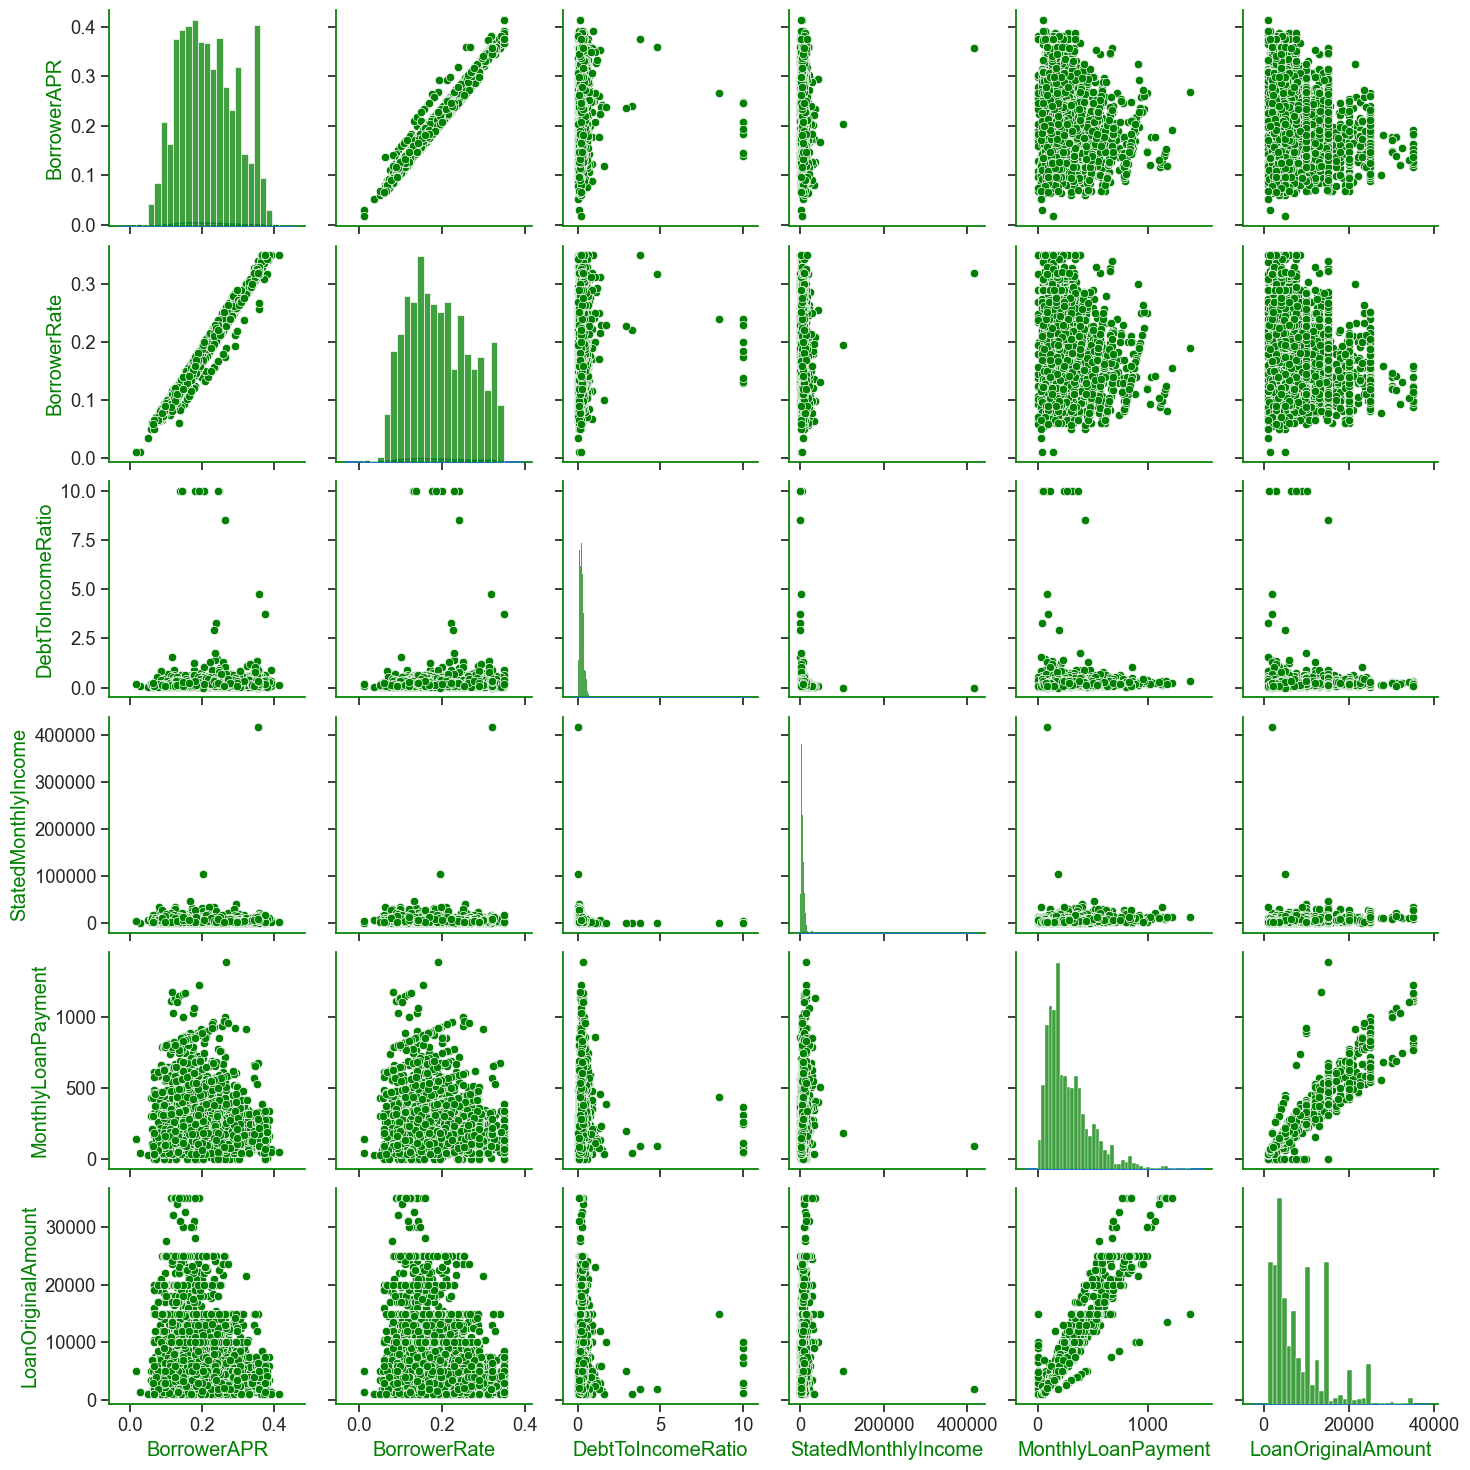

In [87]:
# Take a sample of 3000 loans to plot
samples = np.random.choice(loans.shape[0], 3000, replace=False)
loans_sample = loans.loc[samples, :]

# Plot pairwise relationships between all the numeric variables of interest
sns.set_style("ticks")
g = sns.pairplot(data=loans_sample, vars=numeric_features, diag_kind='kde')

# Set the color to green for all the plots
for ax in g.axes.flat:
    ax.spines['bottom'].set_color('green')
    ax.spines['top'].set_color('green')
    ax.spines['left'].set_color('green')
    ax.spines['right'].set_color('green')
    ax.xaxis.label.set_color('green')
    ax.yaxis.label.set_color('green')

# Add a grid to the plots
g.map_upper(sns.scatterplot, color='green')
g.map_lower(sns.scatterplot, color='green')
g.map_diag(sns.histplot, color='green')

plt.show()

- Borrower APR and loan original amount exhibit a negative correlation with a coefficient of -0.323. The corresponding scatter plot visually confirms this negative relationship, indicating that as the loan amount increases, the APR tends to decrease.

- There is a modest positive correlation, indicated by a correlation coefficient of 0.20, between Loan Original Amount and Stated Monthly Income.

- Borrower APR and Borrower Rate demonstrate a strong positive correlation with a coefficient of 0.99, which is understandable as a higher APR generally results in borrowers paying more interest on their loans.

- As Loan Original Amount increases, there is a corresponding increase in Monthly Loan Payment.

### 2. Quantitative vs. Qualitative

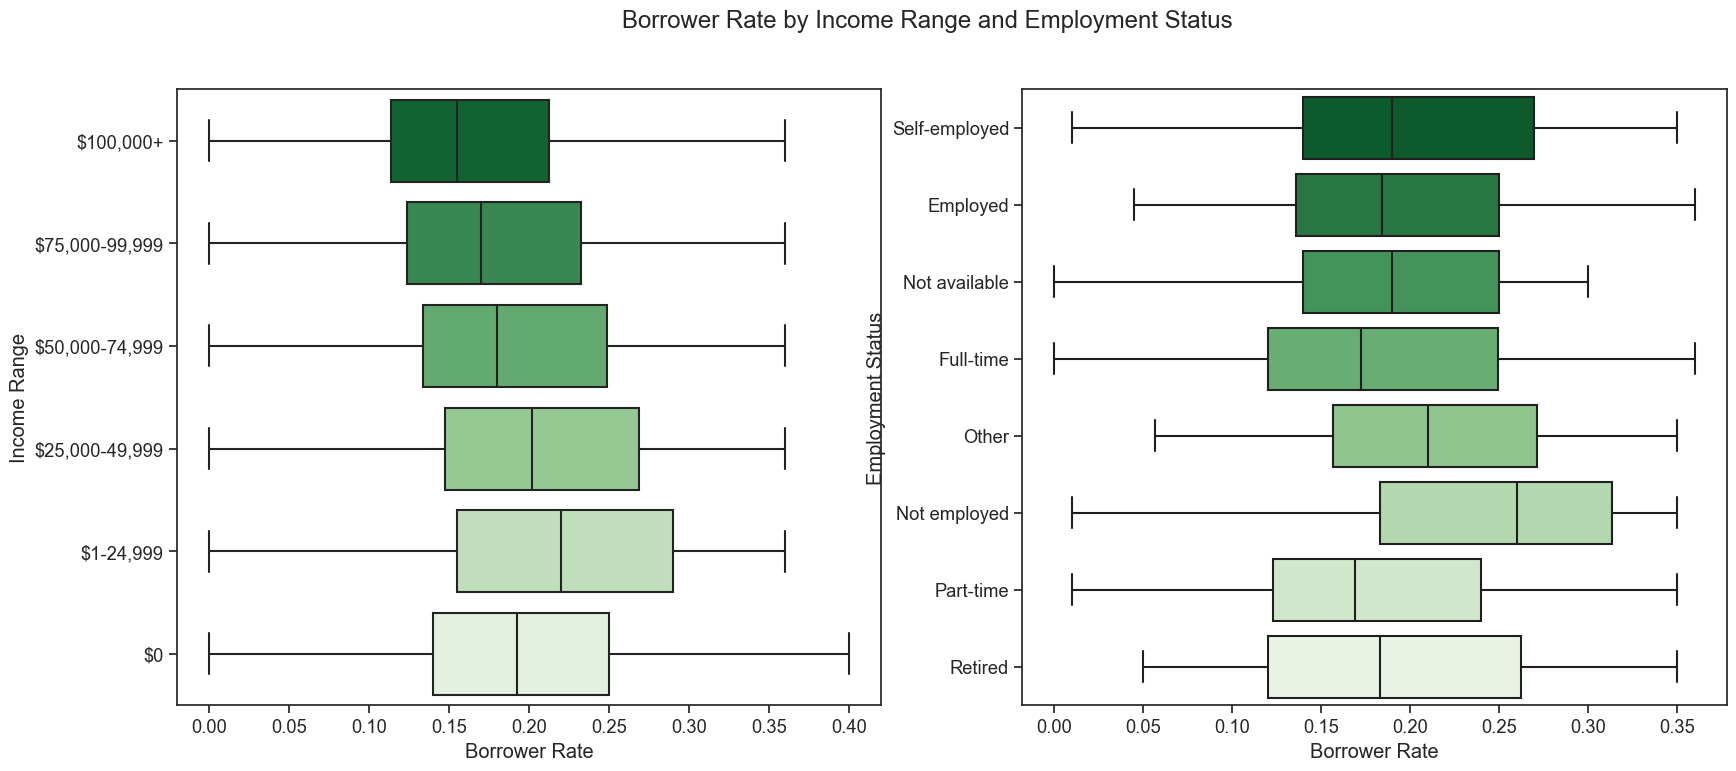

In [88]:
# Set a larger figure size for subplots
plt.figure(figsize=[20, 8])

# Subplot 1
plt.subplot(1, 2, 1)
sns.boxplot(data=loans, y='IncomeRange', x='BorrowerRate', palette='Greens_r', showfliers=False)
plt.ylabel('Income Range')
plt.xlabel('Borrower Rate')

# Subplot 2
plt.subplot(1, 2, 2)
sns.boxplot(data=loans, y='EmploymentStatus', x='BorrowerRate', palette='Greens_r', showfliers=False)
plt.ylabel('Employment Status')
plt.xlabel('Borrower Rate')
plt.suptitle('Borrower Rate by Income Range and Employment Status')
plt.show()


- These boxplots reveal that the income range of 1-24,999k exhibits the highest median borrower rate, deviating from the trend observed in income ranges of 25k and above, where the median borrower rate decreases with higher income levels.
- Within the employment status categories, the "unemployed" group displays the highest median borrower rate, indicating that unemployed individuals tend to incur higher interest costs on their loans.

### 3. Qualitative vs. Qualitiative

Text(0.5, 0, 'ProsperRating (Alpha)')

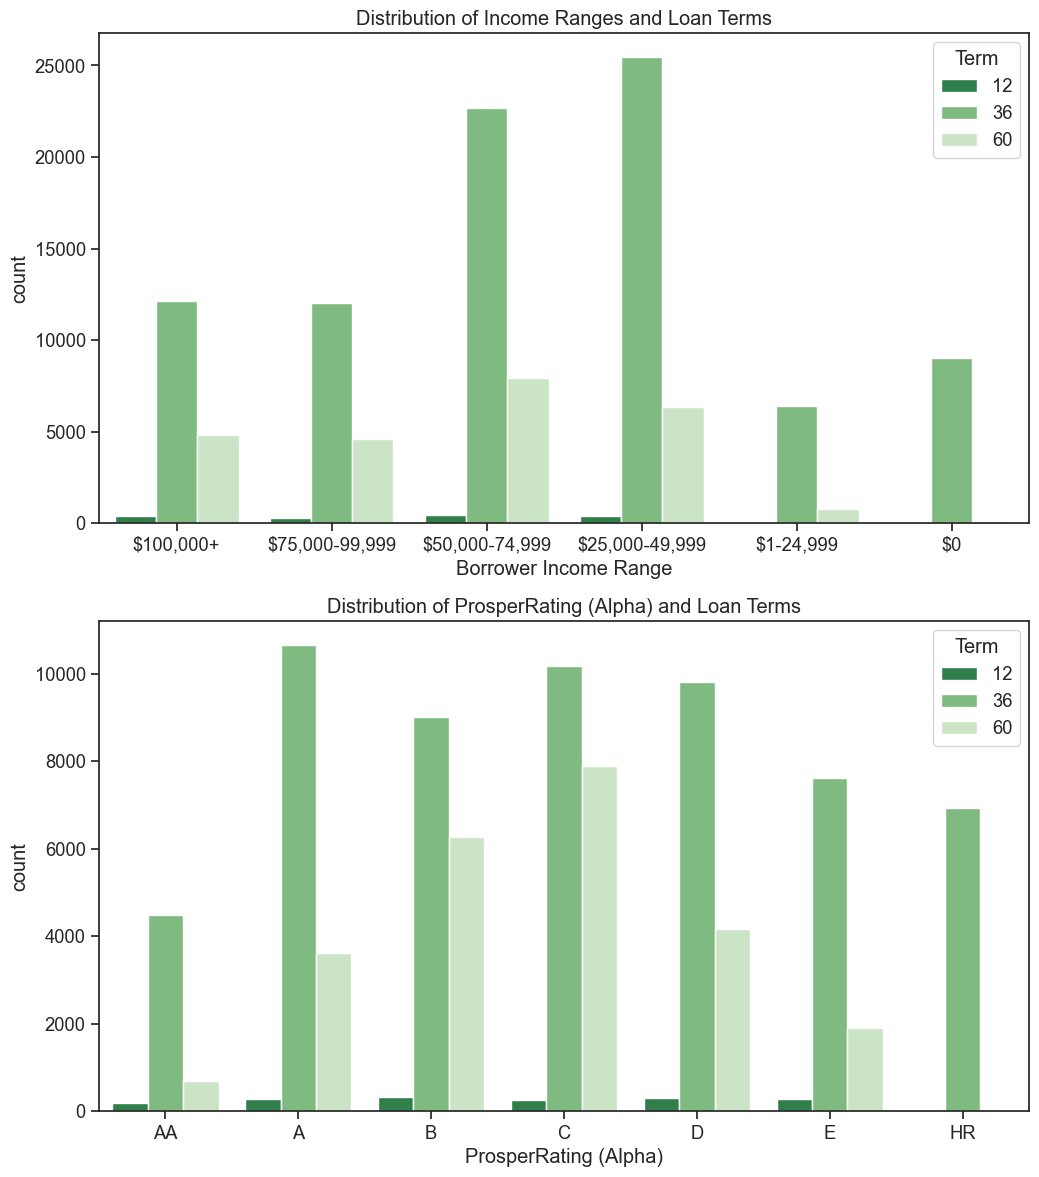

In [89]:
# Clustered bar chart of income range and loan term
plt.figure(figsize=[12, 14])

# Subplot 1: Income range and term distribution
plt.subplot(2, 1, 1)
sns.countplot(data=loans, x='IncomeRange', hue='Term', palette='Greens_r')
plt.title('Distribution of Income Ranges and Loan Terms')
plt.xlabel('Borrower Income Range')

# Subplot 2: Prosper rating and term distribution
plt.subplot(2, 1, 2)
sns.countplot(data=loans, x='ProsperRating (Alpha)', hue='Term', palette='Greens_r')
plt.title('Distribution of ProsperRating (Alpha) and Loan Terms')
plt.xlabel('ProsperRating (Alpha)')


- Borrowers with an income range of `$25,000` - `$49,999` predominantly opt for 36-month loan terms, followed closely by those with income ranges of `$50,000` - `$74,999`. Borrowers with no reported income primarily choose 36-month loan terms.
- Among Prosper rating categories, B and C ratings have a higher proportion of 60-month loans. In contrast, HR-rated borrowers exclusively opt for 36-month terms, while A-rated borrowers show a preference for 36-month loans as well.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset? Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?



- Borrower APR exhibits a negative correlation with loan original amount, implying that as loan amount increases, the APR tends to decrease.
- Strong correlations exist between BorrowerAPR and BorrowerRate, as well as between MonthlyLoanPayment and LoanOriginalAmount.
- A relatively weak positive correlation of 0.20 is observed between LoanOriginalAmount and StatedMonthlyIncome.
- Borrowers within the income range of `$25,000` - `$49,999` primarily opt for 36-month loan terms, followed by those in the `$50,000` `$74,999` income range. Borrowers with zero reported income exclusively select 36-month terms.
- Notably, individuals categorized as unemployed demonstrate the highest median borrower rate, signifying that they pay higher interest rates on loans.

## Multivariate Exploration

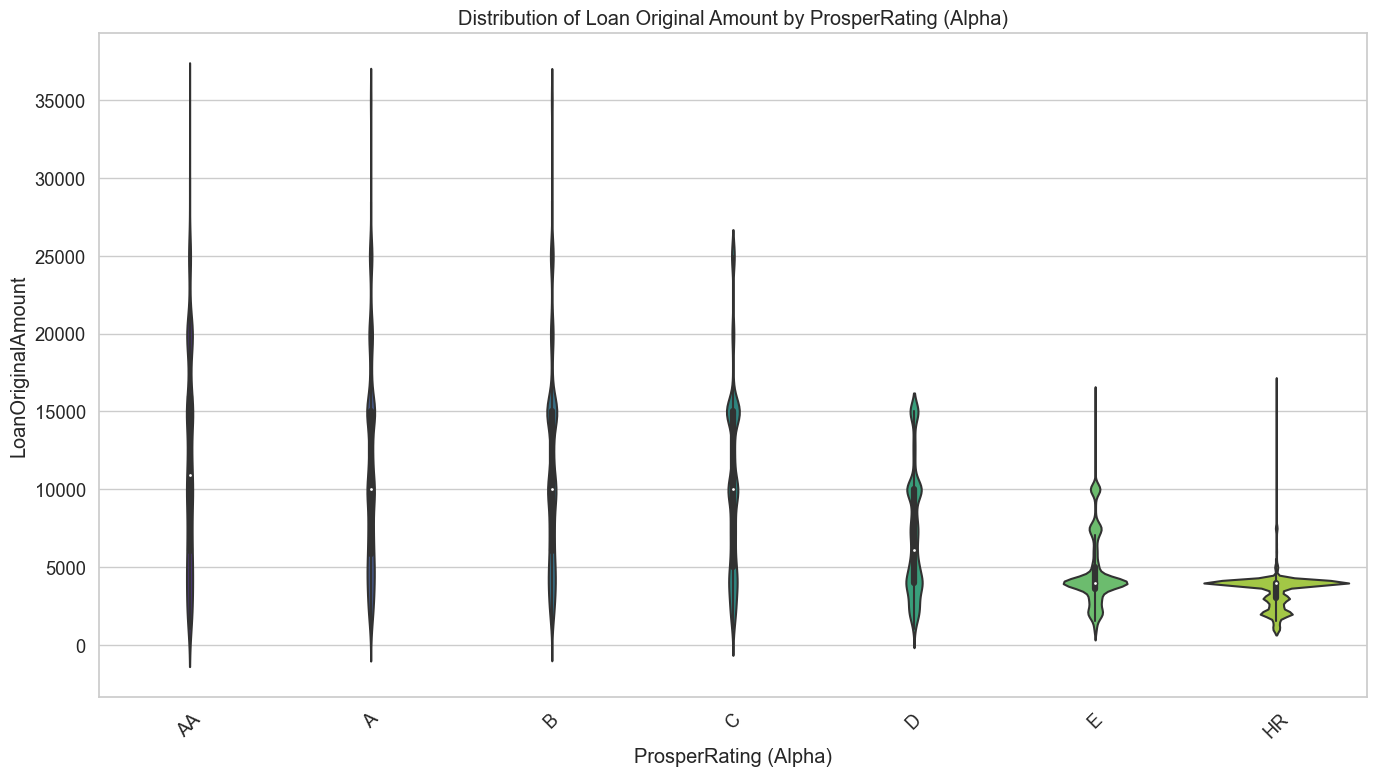

In [90]:
# Set the style and context for the plots
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Create a violin plot to show the distribution of LoanOriginalAmount by ProsperRating (Alpha)
plt.figure(figsize=(14, 8))
sns.violinplot(data=loans, x='ProsperRating (Alpha)', y='LoanOriginalAmount', palette='viridis')
plt.xlabel('ProsperRating (Alpha)')
plt.ylabel('LoanOriginalAmount')
plt.title('Distribution of Loan Original Amount by ProsperRating (Alpha)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- As the rating improves, the loan amount tends to increase.
- With higher ratings, borrowers generally experience lower APRs.
- The correlation between borrower APR and loan amount transitions from negative to slightly positive as Prosper ratings improve.

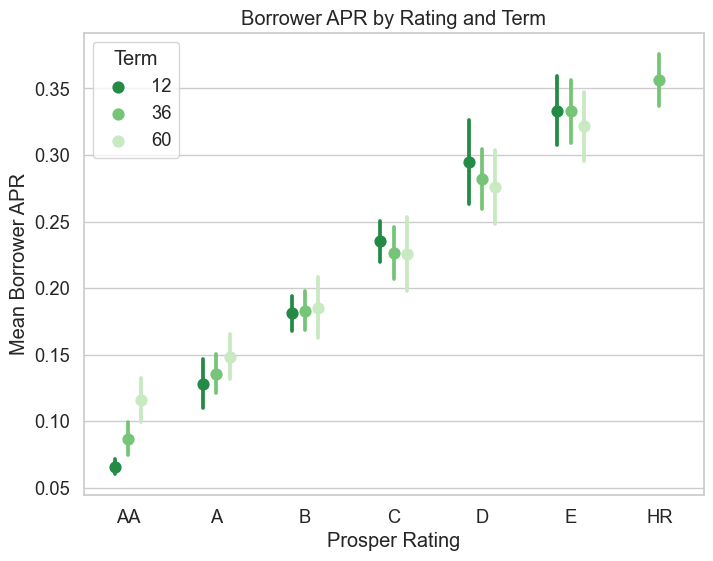

In [91]:
# Create a figure for the point plot
fig = plt.figure(figsize=[8, 6])

# Create a point plot to visualize Borrower APR across Prosper Rating and Loan Term
sns.pointplot(data=loans, x='ProsperRating (Alpha)', y='BorrowerAPR', hue='Term',
              palette='Greens_r', dodge=0.3, errorbar='sd', linestyles='')

# Set the title and labels for the plot
plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR')
plt.xlabel('Prosper Rating')
plt.title('Borrower APR by Rating and Term');


- Higher-rated borrowers (AA-B) experience increasing APRs as the loan term extends.
- Conversely, lower-rated borrowers (C-HR) observe decreasing APRs with longer loan terms.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- As borrowers have better ratings, we observe that the loan amount tends to increase, while the borrower APR decreases. This suggests that borrowers with higher ratings receive larger loans at more favorable interest rates.
- When we specifically analyze the relationship between loan term and APR, interesting patterns emerge. Borrowers with excellent ratings (AA-B) experience increasing APRs as the loan term extends, which may seem counterintuitive. However, for lower-rated borrowers (C-HR), APRs tend to decrease as the loan term becomes longer. This suggests that loan terms interact differently with borrower ratings, potentially reflecting risk assessment variations by lenders.
### Were there any interesting or surprising interactions between features?

- Notably, we found a negative correlation between BorrowerAPR and LoanOriginalAmount. This implies that as borrowers request larger loan amounts, the associated APR tends to decrease. This observation could be significant for both lenders and borrowers, as it indicates a potential benefit for borrowers seeking higher loan amounts in terms of lower interest rates.
### These relationships and interactions provide valuable insights into how borrower ratings, loan terms, loan amounts, and APRs are interconnected, allowing for a more comprehensive understanding of the lending dynamics in the dataset.

In [92]:
from nbconvert import HTMLExporter
import nbformat

# Define the name of the input Jupyter Notebook file
input_notebook = "Prosper_loan_data_exploration.ipynb"  # Replace with your notebook's name

# Define the name of the output HTML file
output_html = "Prosper_loan_data_exploration.html"  # Replace with your desired output file name

# Load the notebook
with open(input_notebook, "r") as notebook_file:
    notebook_content = nbformat.read(notebook_file, as_version=4)

# Create an HTML exporter
html_exporter = HTMLExporter()

# Convert the notebook to HTML
(html_output, resources) = html_exporter.from_notebook_node(notebook_content)

# Save the HTML output to a file
with open(output_html, "w", encoding="utf-8") as output_file:
    output_file.write(html_output)
